In [1]:
import numpy as np
import matplotlib.pyplot as plt # data visualization library
import sklearn

# PCA Faces

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some sid

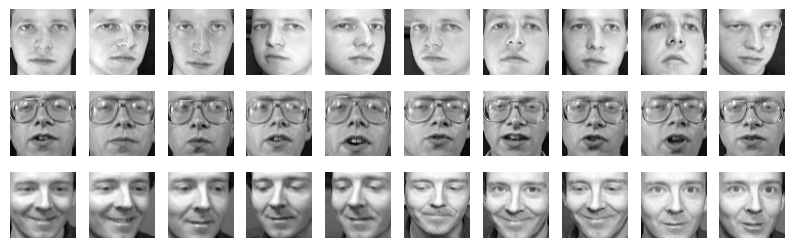

In [3]:
# This is how you plot the first thirty pictures of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))

    ax.imshow(faces.data[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [4]:
D = faces.data
D.shape

(400, 4096)

## 1.1

Obtain principal components

In [5]:
from scipy import linalg as alg

mean_vector = np.mean(D, axis=0)

centered_data = D - mean_vector

U, S, Vt = alg.svd(centered_data, full_matrices=True)

num_components = 50
principal_components = Vt[:num_components, :]
principal_components.shape

(50, 4096)

Plot PC 6

(-0.5, 63.5, 63.5, -0.5)

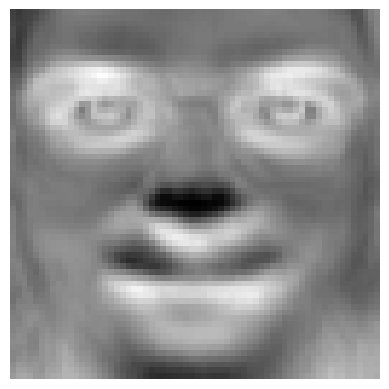

In [6]:
ax = plt.gca()  # Get the current axes
im = ax.imshow(principal_components[5].reshape(64, 64), cmap=plt.cm.gray)  # Display the image on the axes 'ax'
ax.axis('off')  # Turn off the axis labels and ticks

Plot PC 7

(-0.5, 63.5, 63.5, -0.5)

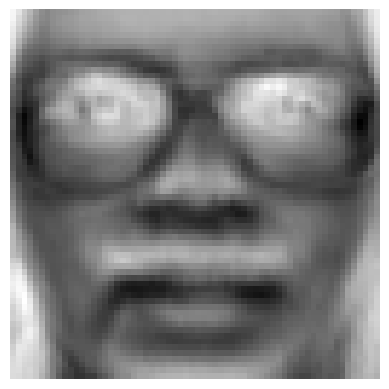

In [7]:
ax = plt.gca()  # Get the current axes
im = ax.imshow(principal_components[6].reshape(64, 64), cmap=plt.cm.gray)  # Display the image on the axes 'ax'
ax.axis('off')  # Turn off the axis labels and ticks

Plot PC 8

(-0.5, 63.5, 63.5, -0.5)

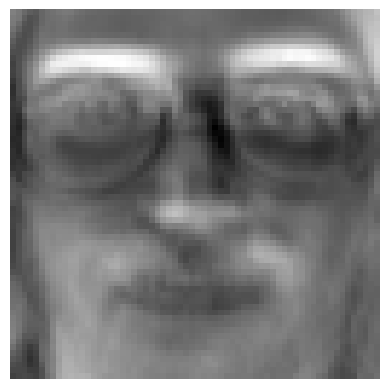

In [8]:
ax = plt.gca()  # Get the current axes
im = ax.imshow(principal_components[7].reshape(64, 64), cmap=plt.cm.gray)  # Display the image on the axes 'ax'
ax.axis('off')  # Turn off the axis labels and ticks

Plot PC 9

(-0.5, 63.5, 63.5, -0.5)

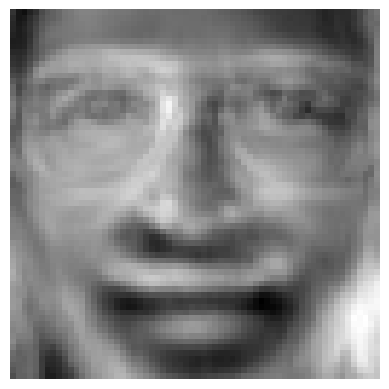

In [9]:
ax = plt.gca()  # Get the current axes
im = ax.imshow(principal_components[8].reshape(64, 64), cmap=plt.cm.gray)  # Display the image on the axes 'ax'
ax.axis('off')  # Turn off the axis labels and ticks

## 1.2

Compute a PCA of dimension r = 3


In [10]:
num_components = 3

U, S, Vt = alg.svd(centered_data, full_matrices=True)

principal_components = Vt[:num_components, :]
low_dimensional_data = centered_data@principal_components.T
low_dimensional_data.shape

(400, 3)

Coordinates of the low-dimensional representation of the 5th datapoint

In [11]:
low_dimensional_data[4]

array([-3.9620106, -3.293863 ,  3.6528668], dtype=float32)

## 1.3

Vector representing low dimensional representation of the face

In [12]:
vector = np.concatenate((np.full(25, 0.5), np.full(25, -0.5)))
vector

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5])

Compute a PCA of dimension r = 50

In [13]:

mean_vector = np.mean(D, axis=0)


centered_data = D - mean_vector


U, S, Vt = alg.svd(centered_data, full_matrices=True)


num_components = 50
principal_components = Vt[:num_components, :]
principal_components.shape

(50, 4096)

Generate face

In [14]:
face = vector@principal_components + mean_vector
face.shape

(4096,)

Plot generated face

(-0.5, 63.5, 63.5, -0.5)

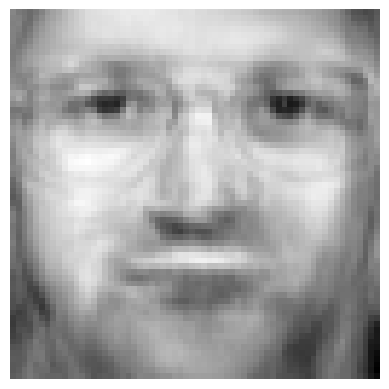

In [15]:
ax = plt.gca()  # Get the current axes
im = ax.imshow(face.reshape(64, 64), cmap=plt.cm.gray)  # Display the image on the axes 'ax'
ax.axis('off')  # Turn off the axis labels and ticks

# k-means initialization

In [16]:
!pip3 show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine-rl, ecos, flax, folium, geemap, gensim, gym, h5py, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lida, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, scikit-image, scikit-learn, scipy, scs, seaborn, sha

If your versions don't match, the following commands (or their anaconda version) could help to get the newest stable release. If you need help with this, please ask the TAs during instruction hours.

In [ ]:
#!pip3 install numpy --upgrade

The functions generating the datasets are given here:

In [18]:
def generateMoons(epsilon, n):
    moons, labels = sklearn.datasets.make_moons(n_samples=n, noise=epsilon, random_state=7)
    return "moons", moons, labels, 2
def generateBlobs(epsilon, n):
    blobs, labels = sklearn.datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 1, epsilon + 1.5, epsilon + 0.5], random_state=54)
    return "blobs", blobs, labels, 3

Implement the centroid initialization here. Right now, it returns a random initialization.

In [19]:
def init_centroids_greedy_pp(D,r,l=10):
    '''
        :param r: (int) number of centroids (clusters)
        :param D: (np-array) the data matrix
        :param l: (int) number of centroid candidates in each step
        :return: (np-array) 'X' the selected centroids from the dataset
    '''
    '''
        :param r: (int) number of centroids (clusters)
        :param D: (np-array) the data matrix
        :param l: (int) number of centroid candidates in each step
        :return: (np-array) 'X' the selected centroids from the dataset
    '''
    rng =  np.random.default_rng(seed=7) # use this random generator to sample the candidates (sampling according to given probabilities can be done via rng.choice(..))
    n,d = D.shape

    indexes = rng.integers(low=0, high=n, size=l)

    sum_vector = []
    for i in range(l):
        sum = 0
        for j in range(n):
            norm_squared = np.linalg.norm(D[j,:] - D[indexes[i],:])**2
            sum += norm_squared
        sum_vector.append(sum)

    sum_vector = np.array(sum_vector)
    ind = np.argmin(sum_vector)

    X = D[ind,:].T

    s=2

    while s<= r:
        probabilities = np.zeros(n)
        for i in range(n):
            probabilities[i] = dist(D[i].T, X) / np.sum(dist(D[j].T, X) for j in range(n))

        indexes = rng.choice(a=n,size=l,replace=False, p=probabilities)

        sum_v = []
        for i in range(l):
            sum = 0
            for j in range(n):
                sum += dist(D[j,:].T, np.column_stack((X, D[indexes[i],:].T)))
            sum_v.append(sum)
        ind = np.argmin(sum_v)
        X = np.column_stack((X, D[ind,:].T))
        print(X.shape)
        s+=1

    return X

Implementation of distance function

In [20]:
def dist(v, X):
    return np.min(np.linalg.norm(X - v[:, np.newaxis], axis=0)**2)

##  greedy k-means++

In [21]:
import scipy

def spectral_clustering(W,r, X_init):
    '''
        :param W: (np-array) nxn similarity/weighted adjacency matrix
        :param r: (int) number of centroids (clusters)
        :param X_init: (function) the centroid initialization function
        :return: (np-array) 'Y' the computed cluster assignment matrix
    '''
    np.random.seed(0)
    L = np.diag(np.array(W.sum(0))[0]) - W
    v0 = np.random.rand(min(L.shape))
    Lambda, V = scipy.sparse.linalg.eigsh(L, k=r+1, which="SM", v0=v0)
    A = V[:,1:] #remove the first eigenvector, assuming that the graph is conected
    initial_points = X_init(A,r)
    X, Y = kmeans(A, r, initial_points)

    return Y

This is the $k$-means implementation from the lecture accompanying notebook.

In [22]:
def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)
def getY(labels):
    '''
        Compute the cluster assignment matrix Y from the categorically encoded labels
    '''
    Y = np.eye(max(labels)+1)[labels]
    return Y
def update_centroid(D,Y):
    cluster_sizes = np.diag(Y.T@Y).copy()
    cluster_sizes[cluster_sizes==0]=1
    return D.T@Y/cluster_sizes
def update_assignment(D,X):
    dist = np.sum((np.expand_dims(D,2) - X)**2,1)
    labels = np.argmin(dist,1)
    return getY(labels)
def kmeans(D,r, X_init, epsilon=0.00001, t_max=10000):
    X = X_init.copy()
    Y = update_assignment(D,X)
    rss_old = RSS(D,X,Y) +2*epsilon
    t=0
    #Looping as long as difference of objective function values is larger than epsilon
    while rss_old - RSS(D,X,Y) > epsilon and t < t_max-1:
        rss_old = RSS(D,X,Y)
        X = update_centroid(D,Y)
        Y = update_assignment(D,X)
        t+=1
    print(t,"iterations")
    return X,Y

## Running k-means on the blobs dataset
We generate the blobs dataset. Run kmeans based on the initialization technique. Finally, we plot the clustering. The initial centroids are marked in red, and the final centroids are marked in blue. You can use this visualization to see if your initialization makes sense. It doesn't work for spectral clustering.

In [23]:
n=500
dataID, D, labels, r = generateBlobs(0.05,n)

In [24]:
X_init = init_centroids_greedy_pp(D,r)
X,Y = kmeans(D,r, X_init)

<ipython-input-19-d5d299ea8e80>:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  probabilities[i] = dist(D[i].T, X) / np.sum(dist(D[j].T, X) for j in range(n))


(2, 2)
(2, 3)
7 iterations


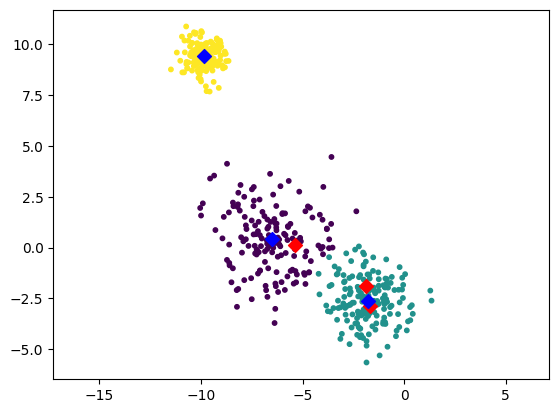

In [25]:

fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
ax.scatter(D[:, 0], D[:, 1], c=np.argmax(Y,axis=1), s=10)
ax.scatter(X_init.T[:, 0], X_init.T[:, 1], c='red', s=50, marker = 'D') # initial centroids are in red
ax.scatter(X.T[:, 0], X.T[:, 1], c='blue', s=50, marker = 'D') # computed centroids are in blue
plt.show()

In [26]:
n, d = D.shape
n,d

(500, 2)

Mean approximation error of the computed k-means clustering

In [27]:
(1.0/(n*d)) * (np.linalg.norm(D-Y@X.T, 'fro')**2)

1.2345652376488239

Evaluation of obtained clustering result by NMI

In [28]:
from sklearn.metrics import normalized_mutual_info_score

Y_lin = []
for row in Y:
  for i in range(3):
    if row[i]:
      Y_lin.append(i)

sklearn.metrics.normalized_mutual_info_score(labels, Y_lin)

0.9527380045058215

## Running spectral clustering on the two moons dataset
We generate the moons dataset and compute spectral clustering with the implemented initialization technique.

In [29]:
dataID, D, labels, r = generateMoons(0.05,n)

Spectral clustering with different numbers of neighbors.

In [30]:
from sklearn.neighbors import radius_neighbors_graph, kneighbors_graph

neighbors_values = [5, 10, 20, 40]

clustering_dict = {}

for n_val in neighbors_values:
  N = kneighbors_graph(D, n_neighbors=n_val, include_self=False, n_jobs=-1)
  W = 0.5*(N+N.T)
  Y = spectral_clustering(W,r,init_centroids_greedy_pp)
  clustering_dict[n_val] = Y


<ipython-input-19-d5d299ea8e80>:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  probabilities[i] = dist(D[i].T, X) / np.sum(dist(D[j].T, X) for j in range(n))


(2, 2)
2 iterations


<ipython-input-19-d5d299ea8e80>:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  probabilities[i] = dist(D[i].T, X) / np.sum(dist(D[j].T, X) for j in range(n))


(2, 2)
2 iterations


<ipython-input-19-d5d299ea8e80>:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  probabilities[i] = dist(D[i].T, X) / np.sum(dist(D[j].T, X) for j in range(n))


(2, 2)
4 iterations


<ipython-input-19-d5d299ea8e80>:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  probabilities[i] = dist(D[i].T, X) / np.sum(dist(D[j].T, X) for j in range(n))


(2, 2)
17 iterations


Plot clustering

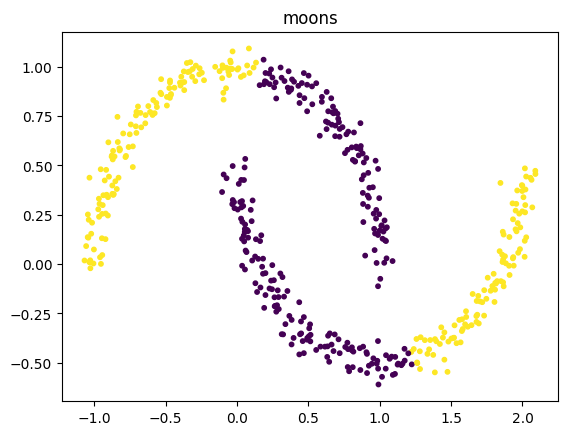

In [31]:
plotted_clustering = clustering_dict[40]
plt.scatter(D[:, 0], D[:, 1], c=np.argmax(plotted_clustering,axis=1), s=10)
plt.title('%s'  % ( dataID) )
plt.show()

Evaluation of obtained clustering result by NMI

In [32]:
from sklearn.metrics import normalized_mutual_info_score

result_dict = {}
for key, val in clustering_dict.items():
  Y_lin = []
  for row in val:
    for i in range(2):
      if row[i]:
        Y_lin.append(i)

  res = sklearn.metrics.normalized_mutual_info_score(labels, Y_lin)
  result_dict[key] = res

result_dict


{5: 0.3918789079344891,
 10: 0.29880378580911876,
 20: 0.3918789079344891,
 40: 0.008439296966470757}

# Your own personal Netflix
## Data Preprocessing

To read the dataset you might need to alter the path to look for it:

In [33]:
import pandas as pd # pandas is a data manipulation library
# lets explore movies.csv
movies= pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
# lets explore ratings.CSV
ratings=pd.read_csv('ml-latest-small/ratings.csv',sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [35]:
min(ratings["rating"]), max(ratings["rating"])

(0.5, 5.0)

In [36]:
df_movie_ratings = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)  #fill unobserved entries with μ
df_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We consider here only the movies which have been rated by more than 100 users. That are 134 movies. We will not be able to infer a pattern for movies with very few observations anyways, but for this exercise we are mostly interested in the principle and do not need a big dataset.

In [37]:
np.sum(np.sum(df_movie_ratings!=0,axis=0)>100)

134

In [38]:
keep_movie = np.sum(df_movie_ratings!=0,axis=0)>100
df_D = df_movie_ratings.loc[:,keep_movie]
df_D.head()

movieId,1,2,6,10,32,34,39,47,50,110,...,7153,7361,7438,8961,33794,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Furthermore, we will throw out all the users which have rated fewer than five movies. It would be hard anyways to make recommendations based on 4 movies.

In [39]:
np.sum(np.sum(df_D!=0,axis=1)>=5)

556

The resulting dataset has the userID as rows and movieIDs as columns. Hence, userID 1 and 4 addresses the first two rows of this dataset.

In [40]:
keep_user = np.sum(df_D!=0,axis=1)>=5
df_D = df_D.loc[keep_user,:]
df_D.head()

movieId,1,2,6,10,32,34,39,47,50,110,...,7153,7361,7438,8961,33794,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,4.0,3.0,4.0,4.0,0.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The movie number- title assignments are given as follows:

In [41]:
movies.loc[movies['movieId'].isin(df_D.columns)]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
5,6,Heat (1995),Action|Crime|Thriller
9,10,GoldenEye (1995),Action|Adventure|Thriller
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
...,...,...,...
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller
6710,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
6772,60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi
7039,68954,Up (2009),Adventure|Animation|Children|Drama


The resulting data matrix is given as follows:

In [42]:
D = df_D.to_numpy()
D.shape

(556, 134)

## 3a


O matrix

In [43]:
O = np.where(D != 0, 1, 0)

Implementation of the error function

In [44]:
def err(D,X,Y):
    """
    Average squared approximation error
    """
    O = np.where(D != 0, 1, 0)
    O_norm = np.linalg.norm(O, 1)
    D_ = O * (Y@X.T)
    err = 1.0 / O_norm * (np.linalg.norm(D - D_, 'fro'))**2
    return err



Implementation of matrix completion

In [45]:
def Matrix_Completion(D, r=20, t_max=100, l=0.1):
    np.random.seed(0)
    n, d = D.shape
    X = np.random.rand(d,r)
    Y = np.random.rand(n,r)
    O = np.where(D != 0, 1, 0)

    for t in range(t_max):
        for k in range(d):
            oxk = np.diag(O[:,k])
            X[k,:] = D[:,k].T @ Y @ np.linalg.inv(Y.T @ oxk @ Y + l*np.eye(r))

        for i in range(n):
            oyi = np.diag(O[i,:])
            Y[i, :] = D[i,:] @ X @ np.linalg.inv(X.T @ oyi @ X + l*np.eye(r))

        print(f"FINISHED step {t}\t\t error: {err(D, X, Y)}")
    return X,Y

In [46]:
X,Y = Matrix_Completion(D)

FINISHED step 0		 error: 15.705679608528845
FINISHED step 1		 error: 11.31374053915938
FINISHED step 2		 error: 9.599755542136169
FINISHED step 3		 error: 8.736329522326177
FINISHED step 4		 error: 8.200662957176217
FINISHED step 5		 error: 7.8104463022702735
FINISHED step 6		 error: 7.51274550308948
FINISHED step 7		 error: 7.28449431531876
FINISHED step 8		 error: 7.1061328766522
FINISHED step 9		 error: 6.961866781563442
FINISHED step 10		 error: 6.841679531340297
FINISHED step 11		 error: 6.739964537557214
FINISHED step 12		 error: 6.6532090949517775
FINISHED step 13		 error: 6.578468340365908
FINISHED step 14		 error: 6.513040961726636
FINISHED step 15		 error: 6.454767512545784
FINISHED step 16		 error: 6.402182162757528
FINISHED step 17		 error: 6.354330149141012
FINISHED step 18		 error: 6.310521152198878
FINISHED step 19		 error: 6.270233565219766
FINISHED step 20		 error: 6.233072917509455
FINISHED step 21		 error: 6.19867848926643
FINISHED step 22		 error: 6.166686451154577


What is the average squared approximation error on the observed entries after 100 iterations?
$$\frac{1}{\lvert O\lvert}\lVert D-O\circ(YX^\top)\rVert^2 = 5.50453$$

Estimate D matrix

In [47]:
X.shape, Y.shape

((134, 20), (556, 20))

In [48]:
D_estimate = O * (Y@X.T)
D_estimate.shape

(556, 134)

In [49]:
df_D_estimate = pd.DataFrame(D_estimate, index=df_D.index, columns=df_D.columns)
df_D_estimate

movieId,1,2,6,10,32,34,39,47,50,110,...,7153,7361,7438,8961,33794,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.359471,0.000000,3.898222,0.000000,0.000000,0.000000,0.000000,4.986143,5.302816,4.679176,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.999434,4.493314,0.000000,0.000000,3.987735
4,0.000000,-0.000000,0.000000,-0.000000,2.067596,-0.000000,-0.000000,2.113355,-0.000000,0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,4.147701,0.000000,0.000000,0.000000,0.000000,3.861455,3.079521,0.000000,4.036924,4.051825,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,3.907102,4.352299,3.072215,3.366693,4.456248,0.000000,3.835311,1.451807,4.861269,...,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.391046,0.000000,0.000000,0.000000,3.763460,0.000000,0.000000,3.857545,4.588111,3.870865,...,4.223155,4.207818,4.933024,3.841826,0.000000,3.848646,0.000000,4.004495,0.000000,0.000000
607,3.783421,0.000000,0.000000,0.000000,0.000000,3.336511,0.000000,0.000000,0.000000,5.233987,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,2.647068,2.807076,0.000000,3.284982,3.745231,2.651137,2.642200,4.128417,4.974011,3.635720,...,3.950855,4.262146,3.828903,3.992035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
df_D

movieId,1,2,6,10,32,34,39,47,50,110,...,7153,7361,7438,8961,33794,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,4.0,3.0,4.0,4.0,0.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,4.0,0.0,0.0,3.0,4.5,3.5,...,4.5,4.0,4.5,4.0,0.0,3.5,0.0,4.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,0.0,4.0,3.5,3.5,3.0,4.5,4.5,4.0,...,4.0,4.5,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


### The Lord of The Rings

Find movie index

In [51]:
# id = movies[movies["title"] == "Lord of the Rings: The Two Towers, The (2002)"]["movieId"]
id_movie = movies[movies["title"] == "Lord of the Rings: The Two Towers, The (2002)"]["movieId"]


In [52]:
cols = df_D.columns
index = 0
for i,col in enumerate(cols):
    if int(col) == int(id_movie):
        index = i
index

119

Rating prediction for first user

In [53]:
predicted_rating = np.dot(Y[0,:], X[index,:])
predicted_rating

5.102241416936987

### The Dark Knight

Find movie index

In [54]:
id_movie = movies[movies["title"] == "Dark Knight, The (2008)"]["movieId"]
id_movie

6710    58559
Name: movieId, dtype: int64

In [55]:
cols = df_D.columns
index = 0
for i,col in enumerate(cols):
    if int(col) == int(id_movie):
        index = i
index

130

Rating prediction for first user

In [56]:
predicted_rating = np.dot(Y[0,:], X[index,:])
predicted_rating

3.660093969087756

### Clueless

Find movie index

In [57]:

id_movie = movies[movies["title"] == "Clueless (1995)"]["movieId"]
id_movie

35    39
Name: movieId, dtype: int64

In [58]:
cols = df_D.columns
index = 0
for i,col in enumerate(cols):
    if int(col) == int(id_movie):
        index = i
index

6

Rating prediction for first user

In [59]:
predicted_rating = np.dot(Y[0,:], X[index,:])
predicted_rating

3.490401340416207

### 2001: A Space Odyssey

Find movie index

In [60]:
id_movie = movies[movies["title"] == "2001: A Space Odyssey (1968)"]["movieId"]
id_movie

706    924
Name: movieId, dtype: int64

In [61]:
cols = df_D.columns
index = 0
for i,col in enumerate(cols):
    if int(col) == int(id_movie):
        index = i
index

59

Rating prediction for first user

In [62]:
predicted_rating = np.dot(Y[0,:], X[index,:])
predicted_rating

2.602943846533198

## 3b

**Lambda = 0.01**

error= 5.5659

illegal missing imputations = 13420

mean = 3.56018

var = 6.0835



**Lambda = 0.1**

error = 5.5045

illegal missing imputations = 8784

mean = 3.4297

var = 2.5334




**Lambda = 0.5**

error = 6.0539

illegal missing imputations = 3912

mean = 3.4239

var = 1.2041

### Lambda = 0.01

Error

In [63]:
l = 0.01
X,Y = X,Y = Matrix_Completion(D, l=l, t_max=100)
error = err(D,X,Y)
error

FINISHED step 0		 error: 15.181572087551558
FINISHED step 1		 error: 11.530710110067496
FINISHED step 2		 error: 9.956752634305053
FINISHED step 3		 error: 9.095804392747723
FINISHED step 4		 error: 8.557213526724055
FINISHED step 5		 error: 8.173121992589222
FINISHED step 6		 error: 7.877873206464021
FINISHED step 7		 error: 7.638498186528987
FINISHED step 8		 error: 7.439141995911382
FINISHED step 9		 error: 7.270112108953639
FINISHED step 10		 error: 7.125490029487684
FINISHED step 11		 error: 7.0017841789259565
FINISHED step 12		 error: 6.896478092098164
FINISHED step 13		 error: 6.806866062574484
FINISHED step 14		 error: 6.729979226231969
FINISHED step 15		 error: 6.663456217215481
FINISHED step 16		 error: 6.605639621488453
FINISHED step 17		 error: 6.554999151955608
FINISHED step 18		 error: 6.510129057698378
FINISHED step 19		 error: 6.46981738752229
FINISHED step 20		 error: 6.433066589363767
FINISHED step 21		 error: 6.399092954789212
FINISHED step 22		 error: 6.367335180389

5.56589924300435

In [64]:
E = Y@X.T
E


array([[ 3.87767115,  4.35741684,  3.82256871, ...,  5.86164566,
         5.19814811,  3.86475925],
       [ 3.00211518,  3.6877021 ,  4.12636243, ...,  6.2829082 ,
         4.46948379,  4.0012319 ],
       [ 4.70979636,  1.01810038,  5.36378071, ...,  9.12324241,
        15.62791253, -0.57487199],
       ...,
       [ 2.90027112,  2.55101304,  4.02382285, ...,  5.74733563,
         3.7290195 ,  5.54028275],
       [ 3.00653858,  2.25890071,  2.94185033, ...,  2.26235033,
         3.94187496,  4.66673496],
       [ 4.43460928,  3.39441311,  4.82924854, ...,  4.46235145,
         3.60533736,  4.27432922]])

In [65]:
n,d = D.shape
missing_imputations = [E[i,j] for i in range(n) for j in range(d) if O[i,j] == 0]
missing_imputations

[4.357416843354494,
 2.827210457676325,
 4.215306979027216,
 4.886062861652707,
 2.9945874584955448,
 6.3527464365321284,
 4.688517071716225,
 3.299717412217374,
 3.0488282347728393,
 2.609718649941992,
 2.049927558318575,
 0.5166600711906457,
 3.090401004331529,
 3.257370437509951,
 3.490045115648084,
 5.395356313668255,
 4.2897618653780105,
 2.1883496867007066,
 2.0560172062475015,
 4.718636229347831,
 3.4708506032910895,
 4.478648894097271,
 2.307379889971713,
 3.671286618845265,
 3.5800153401294352,
 4.810809232045188,
 1.7664003296233992,
 1.7637336735102391,
 4.149288711902176,
 4.876153089667968,
 4.100718943563565,
 2.1573244002731364,
 3.695863079211278,
 5.4305385905825,
 5.051383741559516,
 3.4631174680808776,
 4.396071005955446,
 3.8394487559367723,
 5.359079575285817,
 3.9593882353925944,
 4.636175916676969,
 4.603023286436666,
 1.9081649400024825,
 3.0699680523324138,
 3.4360929276765053,
 3.1704318489150074,
 4.667616027263663,
 5.1957163286499215,
 4.499996996998153,
 7

In [66]:
legal_estimates = sum(1 for i in range(len(missing_imputations)) if 0.5 <=missing_imputations[i] <= 5)
len(missing_imputations) - legal_estimates

13420

Mean of missing values imputations

In [67]:
np.mean(missing_imputations)

3.560179937056294

In [68]:
np.var(missing_imputations)

6.083494371622726

### Lambda = 0.1

Error

In [69]:
l = 0.1
X,Y = X,Y = Matrix_Completion(D, l=l, t_max=100)
error = err(D,X,Y)
error

FINISHED step 0		 error: 15.705679608528845
FINISHED step 1		 error: 11.31374053915938
FINISHED step 2		 error: 9.599755542136169
FINISHED step 3		 error: 8.736329522326177
FINISHED step 4		 error: 8.200662957176217
FINISHED step 5		 error: 7.8104463022702735
FINISHED step 6		 error: 7.51274550308948
FINISHED step 7		 error: 7.28449431531876
FINISHED step 8		 error: 7.1061328766522
FINISHED step 9		 error: 6.961866781563442
FINISHED step 10		 error: 6.841679531340297
FINISHED step 11		 error: 6.739964537557214
FINISHED step 12		 error: 6.6532090949517775
FINISHED step 13		 error: 6.578468340365908
FINISHED step 14		 error: 6.513040961726636
FINISHED step 15		 error: 6.454767512545784
FINISHED step 16		 error: 6.402182162757528
FINISHED step 17		 error: 6.354330149141012
FINISHED step 18		 error: 6.310521152198878
FINISHED step 19		 error: 6.270233565219766
FINISHED step 20		 error: 6.233072917509455
FINISHED step 21		 error: 6.19867848926643
FINISHED step 22		 error: 6.166686451154577


5.504527708387579

In [70]:
E = Y@X.T
E


array([[ 4.35947124,  2.70761411,  3.89822243, ...,  3.94432061,
         4.55288193,  3.49406723],
       [ 2.65293209,  3.48377477,  3.18348879, ...,  2.96628796,
         2.8909838 ,  3.98773529],
       [ 3.31175189, -2.51513384,  0.05960342, ...,  7.18838283,
         5.18904443,  3.20949613],
       ...,
       [ 2.64706819,  2.80707631,  3.6800176 , ...,  4.58907524,
         3.40388993,  5.19869635],
       [ 3.09096498,  3.76702124,  2.3499728 , ...,  5.59042997,
         4.86987094,  4.58941055],
       [ 4.67459602,  3.75836459,  5.09996907, ...,  4.20133592,
         3.75081569,  3.91197602]])

In [71]:
n,d = D.shape
missing_imputations = [E[i,j] for i in range(n) for j in range(d) if O[i,j] == 0]
missing_imputations

[2.7076141132768714,
 2.4579052096095544,
 5.543189607910452,
 4.982338167187764,
 3.4904013404162066,
 5.701436536152048,
 4.511032475913068,
 3.0583926339813923,
 2.619620607553534,
 2.365219725500852,
 2.280158671231069,
 1.9232881219969298,
 4.334656308204603,
 3.1516600481233956,
 3.2028561552315327,
 6.285812207609802,
 3.267847760027841,
 2.9344894294330626,
 3.466041983046305,
 4.518177415112195,
 3.223199443561904,
 4.125939037026727,
 2.384269533132813,
 4.204098177788157,
 2.9586537371018746,
 4.837183040209118,
 3.4679721288549348,
 1.8297466661416553,
 3.984774541595812,
 5.1531856593528165,
 3.35455808136202,
 2.848146825697084,
 4.949971646738907,
 5.0128487437841525,
 2.602943846533199,
 3.306583948458112,
 5.476993826289186,
 3.8849931040594825,
 5.420654409724827,
 6.0255502160908225,
 5.166831722444973,
 4.135184739447241,
 4.178943447568576,
 6.155016892322811,
 4.539689594981171,
 5.116725304928049,
 5.619220045484154,
 4.706949604419962,
 4.756211489629452,
 7.405

In [72]:
legal_estimates = sum(1 for i in range(len(missing_imputations)) if 0.5 <=missing_imputations[i] <= 5)
len(missing_imputations) - legal_estimates

8784

Mean of missing values imputations

In [73]:
np.mean(missing_imputations)

3.4296826077236755

In [74]:
np.var(missing_imputations)

2.5334533292532093

### Lambda = 0.5

Error

In [75]:
l = 0.5
X,Y = X,Y = Matrix_Completion(D, l=l, t_max=100)
error = err(D,X,Y)
error

FINISHED step 0		 error: 17.57751418843284
FINISHED step 1		 error: 11.688676184252927
FINISHED step 2		 error: 9.739076233092346
FINISHED step 3		 error: 8.792130366763987
FINISHED step 4		 error: 8.224939290263519
FINISHED step 5		 error: 7.845539956427037
FINISHED step 6		 error: 7.577093364994079
FINISHED step 7		 error: 7.376627822640093
FINISHED step 8		 error: 7.219842640962769
FINISHED step 9		 error: 7.093821266600531
FINISHED step 10		 error: 6.990605228112431
FINISHED step 11		 error: 6.904347328177263
FINISHED step 12		 error: 6.831064728538787
FINISHED step 13		 error: 6.7683230667591
FINISHED step 14		 error: 6.714474533493226
FINISHED step 15		 error: 6.6680913903369845
FINISHED step 16		 error: 6.627795757783335
FINISHED step 17		 error: 6.592315807962358
FINISHED step 18		 error: 6.560587539153326
FINISHED step 19		 error: 6.53181024958936
FINISHED step 20		 error: 6.505428031664651
FINISHED step 21		 error: 6.481056521159844
FINISHED step 22		 error: 6.458401493814740

6.053975760401786

In [76]:
E = Y@X.T
E


array([[4.45533143, 3.59443474, 3.64662229, ..., 5.35517557, 5.76301038,
        5.28151867],
       [3.07729345, 3.12770376, 3.77654931, ..., 3.10327898, 2.5569157 ,
        3.96370028],
       [1.41740862, 2.04958642, 1.55250024, ..., 4.11988609, 3.54101325,
        3.6752975 ],
       ...,
       [2.54626176, 2.70527091, 4.25047025, ..., 4.61191945, 3.9014738 ,
        4.73738732],
       [3.09911809, 2.93745669, 3.92584628, ..., 3.84007855, 2.43086187,
        4.38905224],
       [4.32611631, 3.66602722, 4.37331963, ..., 4.67581412, 3.53653099,
        4.07680692]])

In [77]:
n,d = D.shape
missing_imputations = [E[i,j] for i in range(n) for j in range(d) if O[i,j] == 0]
missing_imputations

[3.5944347407034307,
 2.7600056299283686,
 5.203158513934702,
 3.726274013333959,
 2.8948960281649567,
 4.5323979636344625,
 4.5353843897770485,
 3.5526919034710076,
 2.6892587813039985,
 2.7890883321298388,
 2.354674511609193,
 2.26970765123363,
 4.139800563296602,
 3.13225097497068,
 4.907657424509197,
 5.739558820166153,
 3.7736021023631703,
 2.6790099170594077,
 3.0406485621852,
 4.86234192700462,
 3.7117597517257757,
 4.378293940445047,
 2.3685803916299752,
 4.452515834611903,
 3.201516609109305,
 4.701597404322585,
 2.675298822157071,
 3.0267371480219802,
 4.746423564624857,
 4.173055413798074,
 4.33974032673086,
 3.7228863703597033,
 4.344768255574764,
 5.269933416062066,
 2.6240917398205545,
 3.6490077541446295,
 4.893619549176542,
 3.4542655503496262,
 4.603696270093701,
 4.7268647044345995,
 4.554407190701297,
 3.9728339355814204,
 1.5763117450972581,
 4.074468679370148,
 2.827299767103932,
 3.709469603786435,
 4.690752891460498,
 4.674068182292229,
 4.590078724240798,
 6.179

In [78]:
legal_estimates = sum(1 for i in range(len(missing_imputations)) if 0.5 <=missing_imputations[i] <= 5)
len(missing_imputations) - legal_estimates

3912

Mean of missing values imputations

In [79]:
np.mean(missing_imputations)

3.423917063926379

In [80]:
np.var(missing_imputations)

1.204101823092557

# MNIST ANN

In [81]:
import torch
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
device

'cpu'

## Define the network architecture

In [82]:
import torch.nn as nn
import torch.nn.functional as F

# The embedding architecture returns the
# output of the penultimate layer
class Embed(nn.Module):
    def __init__(self,embedding_dim=84):
        super(Embed, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(256, 120)
        self.fc2   = nn.Linear(120, embedding_dim)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        #print(f"OUT 1: {out.shape}")

        out = F.max_pool2d(out, 2)
        #print(f"OUT 2: {out.shape}")

        out = F.relu(self.conv2(out))
        #print(f"OUT 3: {out.shape}")

        out = F.max_pool2d(out, 2)
        #print(f"OUT 4: {out.shape}")

        out = out.view(out.size(0), -1)
        #print(f"OUT 5: {out.shape}")

        out = F.relu(self.fc1(out))
        #print(f"OUT 6: {out.shape}")

        out = F.relu(self.fc2(out))
        return out

class Net(nn.Module):
    def __init__(self,embedding_dim, classifier):
        super(Net, self).__init__()
        self.embed = Embed(embedding_dim=embedding_dim)
        self.classifier = classifier

    def forward(self, x):
        out = self.embed(x)
        out = self.classifier(out)
        return out

    def conf(self,x):
        out = self.embed(x)
        return F.softmax(self.classifier(out),dim=1)

## Load the data: the first four MNIST classes

In [83]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

classes = ('0', '1', '2', '3')
c=4

# Data
print('==> Preparing data..')
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=trans)

# Select only some classes
idx = train_data.targets < c
train_data.targets = train_data.targets[idx]
train_data.data = train_data.data[idx]
trainloader = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=2)


testset = datasets.MNIST(root='./data', train=False, download=True, transform=trans)
# Select only some classes
idx = testset.targets < c
testset.targets = testset.targets[idx]
testset.data = testset.data[idx]
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

==> Preparing data..


100%|██████████| 9912422/9912422 [00:00<00:00, 252699945.57it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 21635237.33it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 129562026.20it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 9794616.33it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Implementation of the training and testing

In [84]:
import time
def train_epoch(net, criterion, optimizer, trainloader, verbose=False):
    train_loss, correct, conf = 0, 0, 0
    start_time=time.time()
    net.train()
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        # Set the gradient to zero
        optimizer.zero_grad()
        # Do the forward pass
        logits = net(inputs)
        loss = criterion(logits, targets)
        if verbose:
            print("loss:",loss.item())
        # Do the backward pass
        loss.backward()
        # Do a gradient descent step
        optimizer.step()

        with torch.no_grad(): #Disable gradient tracking and compute some statistics
            train_loss += loss.item()
            y_probs = F.softmax(logits, dim=1)
            confBatch, predicted = y_probs.max(1)
            correct += predicted.eq(targets).sum().item()
            conf+=confBatch.sum().item()
    execution_time = (time.time() - start_time)
    n=len(trainloader.dataset)
    print('Loss: %.3f | Acc: %.3f%% (%d/%d) | Conf %.2f | time (s): %.2f'% (train_loss/len(trainloader), 100.*correct/n, correct, n, 100*conf/n, execution_time))
    return (100.*correct/n, 100*conf/n)

def test_acc(net, criterion, data_loader):
    net.eval()
    test_loss, correct, conf, total = 0,0,0,0
    with torch.no_grad(): # disable gradient tracking
        for batch_idx, (inputs, targets) in enumerate(data_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            logits = net(inputs)
            loss = criterion(logits, targets)

            test_loss += loss.item()
            y_probs = F.softmax(logits, dim=1)
            confBatch, predicted = y_probs.max(1)
            correct += predicted.eq(targets).sum().item()
            conf+=confBatch.sum().item()
    n=len(data_loader.dataset)
    print('Loss: %.3f | Acc: %.3f%% (%d/%d) | Conf %.2f'% (test_loss/max(len(data_loader),1), 100.*correct/n, correct, n, 100*conf/n))
    return (100.*correct/n, 100*conf/n)

## Create the model and perform the optimization for 40 epochs

Train network with lr=0.01, momentum=0.9, weight_decay=0.00001 for 40 epochs

In [85]:
d=2
# Model
print('==> Building model..')
classifier = nn.Linear(d, c, bias=True)
net = Net(embedding_dim=d, classifier=classifier)
net = net.to(device)

criterion = nn.CrossEntropyLoss()

sgd = torch.optim.SGD([{'params': net.parameters()},],
                lr=0.001, momentum=0.9, weight_decay=0.00001)

==> Building model..


In [86]:
import os
for epoch in range(25):
    print('\nEpoch: %d' % epoch)
    train_epoch(net, criterion, sgd, trainloader)
    (acc,conf) = test_acc(net,criterion, testloader)

print('Saving..')
state = {'net': net.state_dict(),'acc': acc}
if not os.path.isdir('checkpoint'):
    os.mkdir('checkpoint')
torch.save(state, './checkpoint/net.t7')


Epoch: 0
Loss: 1.446 | Acc: 27.236% (6742/24754) | Conf 43.36 | time (s): 6.95
Loss: 1.406 | Acc: 27.303% (1135/4157) | Conf 39.21

Epoch: 1
Loss: 1.370 | Acc: 27.236% (6742/24754) | Conf 37.18 | time (s): 5.74
Loss: 1.326 | Acc: 27.303% (1135/4157) | Conf 36.27

Epoch: 2
Loss: 1.241 | Acc: 30.492% (7548/24754) | Conf 38.03 | time (s): 6.74
Loss: 1.118 | Acc: 46.957% (1952/4157) | Conf 41.40

Epoch: 3
Loss: 0.969 | Acc: 63.307% (15671/24754) | Conf 46.98 | time (s): 5.64
Loss: 0.794 | Acc: 73.082% (3038/4157) | Conf 54.71

Epoch: 4
Loss: 0.687 | Acc: 79.054% (19569/24754) | Conf 60.32 | time (s): 6.57
Loss: 0.574 | Acc: 86.336% (3589/4157) | Conf 64.54

Epoch: 5
Loss: 0.515 | Acc: 90.911% (22504/24754) | Conf 67.77 | time (s): 6.30
Loss: 0.415 | Acc: 94.491% (3928/4157) | Conf 72.52

Epoch: 6
Loss: 0.379 | Acc: 94.159% (23308/24754) | Conf 76.12 | time (s): 5.44
Loss: 0.308 | Acc: 95.983% (3990/4157) | Conf 79.58

Epoch: 7
Loss: 0.299 | Acc: 95.241% (23576/24754) | Conf 81.73 | time (

## Plot the latent space representations

In [87]:
# Load the saved net
classifier = nn.Linear(d, c,bias=True)
net = Net(embedding_dim=d, classifier=classifier)
checkpoint = torch.load("checkpoint/net.t7",map_location='cpu')
net.load_state_dict(checkpoint['net'])
net.eval()
print('ACC:\t',checkpoint['acc'])

ACC:	 98.84532114505653


In [88]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def scatter_pictures(inputs, outputs, samples=30):
    zoom = 0.7

    for j in range(min(inputs.shape[0],samples)):
        image = inputs[j,:,:,:].squeeze()
        im = OffsetImage(image, cmap="gray",zoom=zoom)
        ab = AnnotationBbox(im, (outputs[j,0], outputs[j,1]), xycoords='data', frameon=False, alpha=0.5)
        ax.add_artist(ab)

In [89]:
import matplotlib.pyplot as plt
def plot_conf(conf, show_class_assignment=False, x_max=20, y_max=20, x_min=-1, y_min=-1):
    x = np.arange(x_min, x_max, 0.05)
    y = np.arange(y_min, y_max, 0.05)

    xx, yy = np.meshgrid(x, y)
    X = np.array([xx,yy]).reshape(2,x.shape[0]*y.shape[0]).T
    Z = conf(torch.from_numpy(X).float()).t()
    Z = Z.reshape(-1,y.shape[0],x.shape[0]).cpu().detach().numpy()
    if show_class_assignment:
        h = plt.contourf(x,y,Z.argmax(axis=0),cmap='magma')
    else:
        h = plt.contourf(x,y,Z.max(axis=0),cmap='magma')
        plt.clim(0, 1)
        cb = plt.colorbar()
        cb.set_label('Confidence')
    plt.axis('scaled')

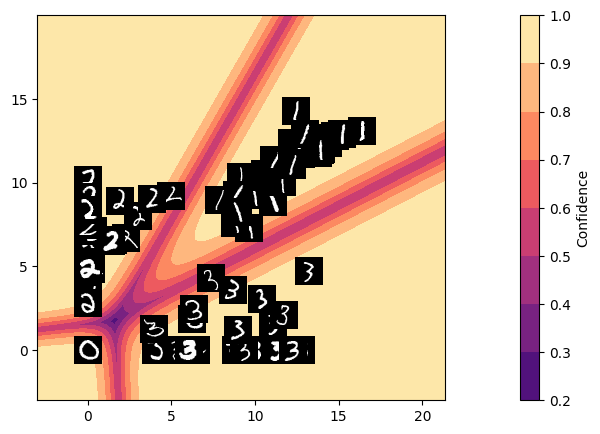

In [90]:
import numpy as np

inputs, targets = next(iter(testloader)) #load a batch
outputs = net.embed(inputs).detach()
fig, ax = plt.subplots(figsize=(8,5))
plot_conf((lambda x: torch.softmax(net.classifier(x),dim=1)), x_max =max(outputs[:,0])+5, y_max =max(outputs[:,1])+5, x_min =min(outputs[:,0])-3, y_min =min(outputs[:,1])-3)
scatter_pictures(inputs, outputs,samples=100)

## Plot Representations of out-of-distribution data

In [91]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
c=10

# Data
print('==> Preparing data..')
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=trans)
trainloader_fashion = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=2)


testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=trans)
testloader_fashion = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=False, num_workers=2)

==> Preparing data..


100%|██████████| 26421880/26421880 [00:01<00:00, 17303546.94it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 334113.01it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6047391.53it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10010327.77it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



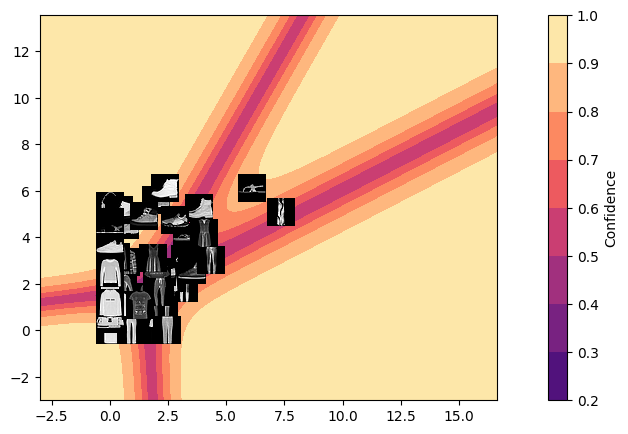

In [92]:
inputs, targets = next(iter(testloader_fashion))
outputs = net.embed(inputs).detach()
fig, ax = plt.subplots(figsize=(8,5))
plot_conf((lambda x: torch.softmax(net.classifier(x),dim=1)), x_max =max(outputs[:,0])+5, y_max =max(outputs[:,1])+5, x_min =min(outputs[:,0])-3, y_min =min(outputs[:,1])-3)
scatter_pictures(inputs, outputs,samples=100)

In [93]:
biases = classifier.bias.data.cpu().numpy()
print(biases)
W = net.classifier.weight.data.cpu().numpy()
print(W)

[ 2.4469373  -1.5832676  -0.81208736 -0.5295157 ]
[[-0.7435546  -0.83654904]
 [ 0.40480056  0.44144368]
 [-0.98759204  1.2400376 ]
 [ 1.0174415  -0.74371594]]
